In [1]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib ipympl

In [21]:
z = [0.0045,0.0142,0.028]
alpha = [1.0, 1.6, 1.82]
mass = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

h = mr.MesaData("test2_grid_deuterium_tau100/results/mass0.35_alpha1.82_z0.0142/history.data")

#Find the surface of the outermost radiative zone in the star
radiative = np.zeros( len(h.data("model_number")) )
for j in range(len(radiative)):
    for i in range(20,0, -1):             #We start with the outermost changes
                                          # in mixing properties
        a = "mix_qtop_{}".format(i)
        b = "mix_type_{}".format(i)
        if abs(h.data(b)[j])<0.1:         # = 0 for radiative zone
            radiative[j] = h.data(a)[j]
            break                         #Stop at the first value that works 
                                          #(the outermost radiative zone)
mass_CE = 1-radiative[-1]

0.6309469109455283


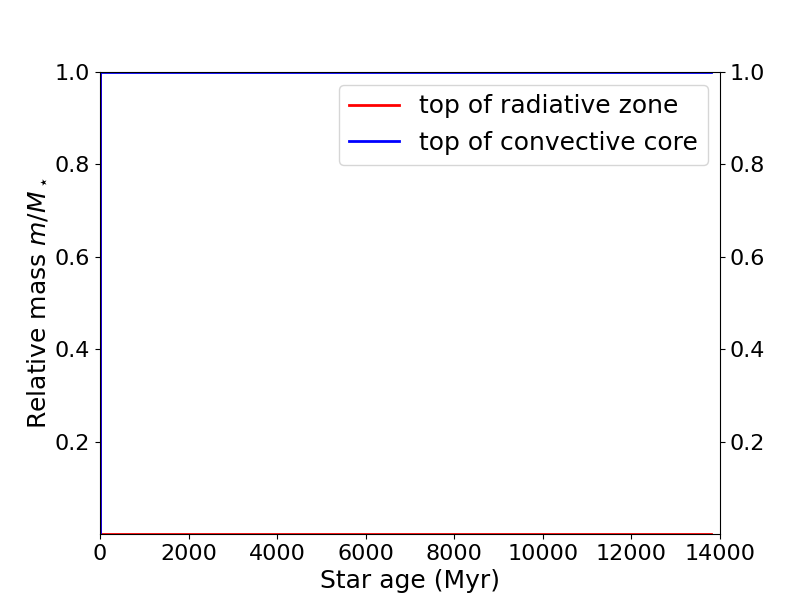

---------------------------------------------------------------------
 At time 13787000000.0
 The radiative zone reaches up to m/M= 0.0 
 The convective envelope contains m/M= 1.0 
 The convective core contains m/M= 1.0
A better description requires the plotting of a Kippenhahn diagram
---------------------------------------------------------------------


In [19]:
colours = ["blue", "orange", "green", "purple", "red", "black"]

plt.figure(figsize=(8,6))

#Have ticks on both sides for y-axis
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

#Plot age vs. radiative zone, convective core and surface
plt.plot(h.data("star_age")/1e6, np.ones(len(h.data("star_age"))),c="k")
plt.plot(h.data("star_age")/1e6, radiative, c="red", lw=2, label="top of radiative zone")
plt.plot(h.data("star_age")/1e6,
        h.data("mass_conv_core")/h.data("star_mass"),c="blue", 
        label="top of convective core",lw=2)


plt.xlim((1e-6, 1.4e4))
plt.ylim((1e-8, 1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.xscale("log")
plt.legend(fontsize=18)
plt.xlabel("Star age (Myr)", fontsize=18)
plt.ylabel(r"Relative mass $m/M_\star$", fontsize=18)
plt.savefig("radconv.jpg",dpi=300)
plt.show()

# Consider using log axes (especially on the x axis or to compare with
# a Kippenhahn diagram. Right now we ignore completely mixing through
# overshooting or semiconvection, and we cannot know what happens between the
# surface of the radiative zone and the convective core

print("---------------------------------------------------------------------")
print(" At time {}".format(h.data("star_age")[-1]) )
print(" The radiative zone reaches up to m/M= {} ".format(radiative[-1]) )
print(" The convective envelope contains m/M= {} ".format(1-radiative[-1]) )
print(" The convective core contains m/M= {}".format(
    h.data("mass_conv_core")[-1]/h.data("star_mass")[-1]) )
print("A better description requires the plotting of a Kippenhahn diagram")
print("---------------------------------------------------------------------")

In [26]:
# Definir los valores de z, alpha y mass
z = [0.0045, 0.0142, 0.028]
alpha = [1.0, 1.6, 1.82]
mass = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

# Inicializamos un diccionario para almacenar las listas de mass_CE
mass_CE_dict = {}

# Iterar sobre todas las combinaciones de z y alpha
for a in alpha:
    for z_val in z:
        # Crear la lista que contendrá los valores de mass_CE para las diferentes masas
        mass_CE_list = []
        
        # Iterar sobre las masas
        for m in mass:
            # Cargar los datos de MESA para la combinación actual
            # La ruta del archivo cambia según alpha, z y mass
            filepath = f"test2_grid_deuterium_tau100/results/mass{m}_alpha{a}_z{z_val}/history.data"
            h = mr.MesaData(filepath)
            
            # Encontrar la superficie de la zona radiativa más externa
            radiative = np.zeros(len(h.data("model_number")))
            for j in range(len(radiative)):
                for i in range(20, 0, -1):
                    a_mix = f"mix_qtop_{i}"
                    b_mix = f"mix_type_{i}"
                    if abs(h.data(b_mix)[j]) < 0.1:  # Radiative zone when mix_type is ~0
                        radiative[j] = h.data(a_mix)[j]
                        break  # Detenerse en la primera zona radiativa más externa
            
            # Calcular mass_CE como 1 - última zona radiativa
            mass_CE = 1 - radiative[-1]
            
            # Añadir el valor de mass_CE correspondiente a la masa actual a la lista
            mass_CE_list.append(mass_CE)
        
        # Guardar la lista en el diccionario con el nombre correspondiente a alpha y z
        list_name = f'mass_CE_alpha{str(a).replace(".", "p")}_z{str(z_val).replace(".", "p")}'
        mass_CE_dict[list_name] = mass_CE_list

# Ahora mass_CE_dict contiene una lista para cada combinación de alpha y z.
# Cada lista contiene los valores de mass_CE para todas las masas.


In [27]:
# Ejemplo

mass_CE_alpha1p0_z0p0142 = mass_CE_dict['mass_CE_alpha1p0_z0p0142']
print(mass_CE_alpha1p0_z0p0142)  # Imprime la lista de mass_CE para cada masa en esa combinación de alpha y z

[1.0, 1.0, 1.0, 1.0, 1.0, 0.629278562895093, 0.3997296904899621, 0.2677623548784732, 0.19382478716399154, 0.15267684891181676, 0.11277544998293065]


In [28]:
mass_CE_alpha1p0_z0p0045 = mass_CE_dict['mass_CE_alpha1p0_z0p0045']
mass_CE_alpha1p0_z0p0142 = mass_CE_dict['mass_CE_alpha1p0_z0p0142']
mass_CE_alpha1p0_z0p028 = mass_CE_dict['mass_CE_alpha1p0_z0p028']

mass_CE_alpha1p6_z0p0045 = mass_CE_dict['mass_CE_alpha1p6_z0p0045']
mass_CE_alpha1p6_z0p0142 = mass_CE_dict['mass_CE_alpha1p6_z0p0142']
mass_CE_alpha1p6_z0p028 = mass_CE_dict['mass_CE_alpha1p6_z0p028']

mass_CE_alpha1p82_z0p0045 = mass_CE_dict['mass_CE_alpha1p82_z0p0045']
mass_CE_alpha1p82_z0p0142 = mass_CE_dict['mass_CE_alpha1p82_z0p0142']
mass_CE_alpha1p82_z0p028 = mass_CE_dict['mass_CE_alpha1p82_z0p028']

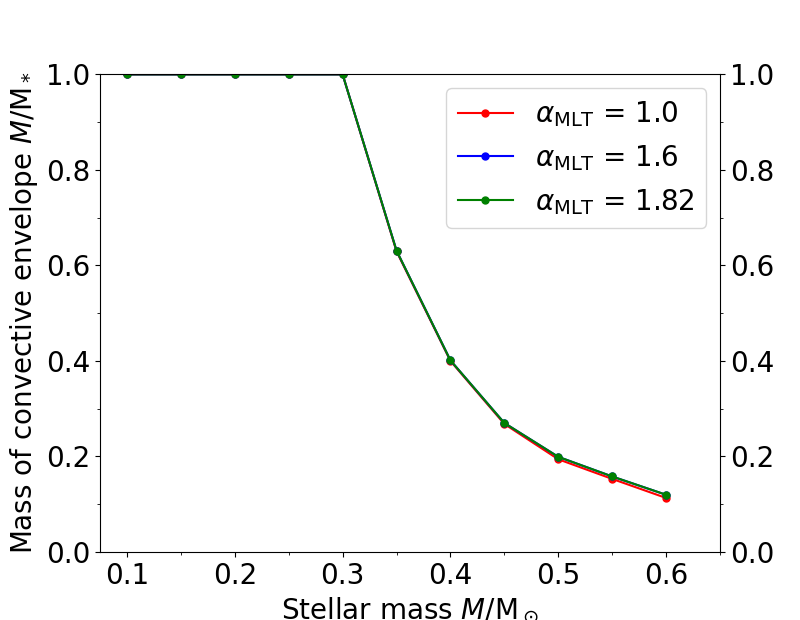

In [64]:
# Plot para [Fe/H] = 0 y distintos alpha

plt.figure(figsize=(8,6.2))

plt.plot(mass, mass_CE_alpha1p0_z0p0142, c='red', marker='o', markersize=5, label=r'$\alpha_\text{MLT}$ = 1.0')
plt.plot(mass, mass_CE_alpha1p6_z0p0142, c='blue', marker='o', markersize=5, label=r'$\alpha_\text{MLT}$ = 1.6')
plt.plot(mass, mass_CE_alpha1p6_z0p0142, c='green', marker='o', markersize=5, label=r'$\alpha_\text{MLT}$ = 1.82')

# Set axis labels
plt.xlabel(r'Stellar mass $M$/M$_\odot$', fontsize=20)
plt.ylabel(r'Mass of convective envelope $M$/$\rm{M}_*$', fontsize=20)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.7, 0.1)
xminor_ticks = np.arange(0.1, 0.7, 0.05)
ymajor_ticks = np.arange(0, 1.2, 0.2)
yminor_ticks = np.arange(0, 1.2, 0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.ylim((0, 1))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

#plt.savefig('mass_CE_fixed_FeH_different_alphas.png', dpi=300, bbox_inches='tight')

plt.show()

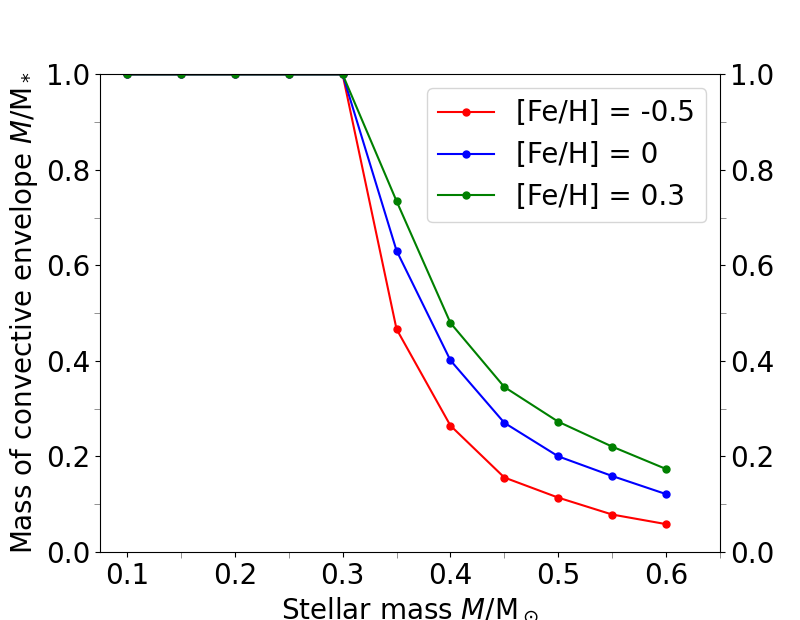

In [66]:
# Plot para alpha=1.82 y distintos [Fe/H]

plt.figure(figsize=(8,6.2))

plt.plot(mass, mass_CE_alpha1p82_z0p0045, c='red', marker='o', markersize=5, label=r'[Fe/H] = -0.5')
plt.plot(mass, mass_CE_alpha1p82_z0p0142, c='blue', marker='o', markersize=5, label=r'[Fe/H] = 0')
plt.plot(mass, mass_CE_alpha1p82_z0p028, c='green', marker='o', markersize=5, label=r'[Fe/H] = 0.3')

# Set axis labels
plt.xlabel(r'Stellar mass $M$/M$_\odot$', fontsize=20)
plt.ylabel(r'Mass of convective envelope $M$/$\rm{M}_*$', fontsize=20)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.7, 0.1)
xminor_ticks = np.arange(0.1, 0.7, 0.05)
ymajor_ticks = np.arange(0, 1.2, 0.2)
yminor_ticks = np.arange(0, 1.2, 0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.ylim((0, 1))

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', length=4, color='gray')


plt.legend(fontsize=20)

#plt.savefig('mass_CE_fixed_alpha_different_FeH.png', dpi=300, bbox_inches='tight')

plt.show()